In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.set_index('Date', inplace=True)

## shows the closing price trend

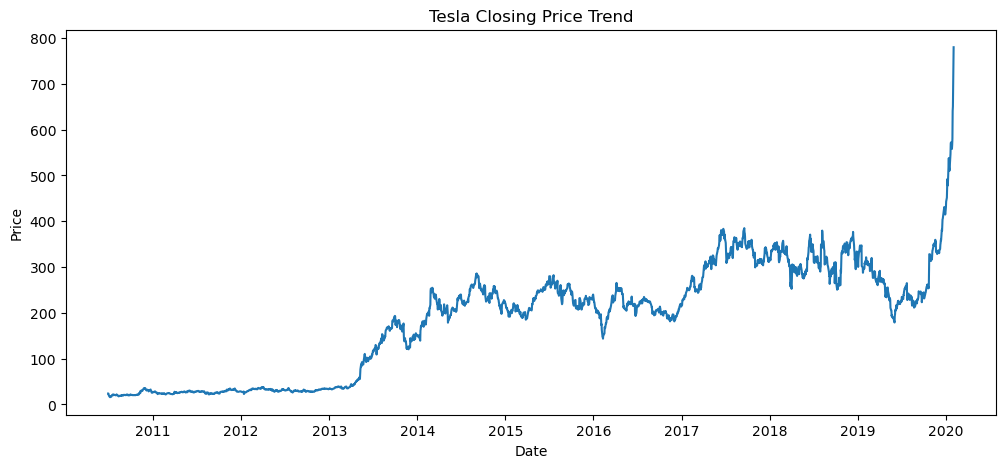

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'])
plt.title("Tesla Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

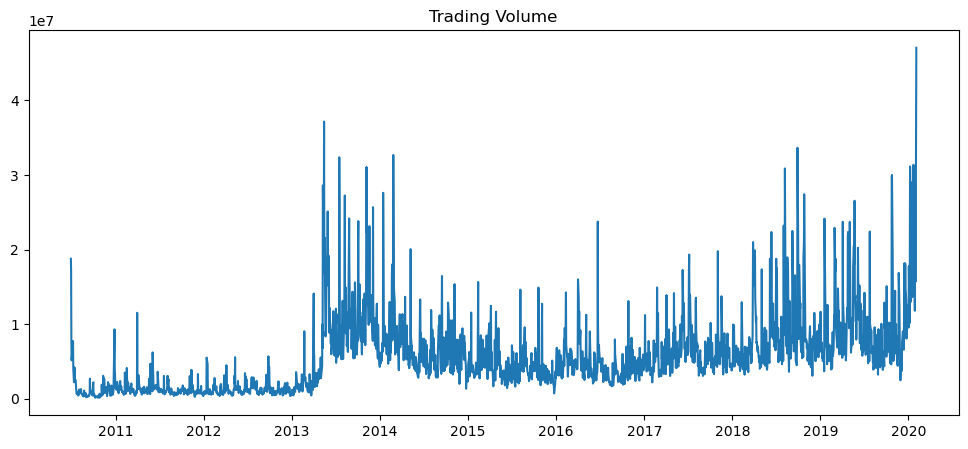

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df['Volume'])
plt.title("Trading Volume")
plt.show()

In [9]:
data = df[['Close']]
data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [11]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [12]:
WINDOW = 60
X, y = create_sequences(scaled_data, WINDOW)

In [13]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [14]:
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
rnn_model.compile(optimizer='adam', loss='mse')

In [16]:
rnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0120 - val_loss: 0.0040
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 7.4596e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2107e-04 - val_loss: 0.0013
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.7147e-04 - val_loss: 0.0038
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.5055e-04 - val_loss: 4.2057e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.6975e-04 - val_loss: 8.3156e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.7942e-04 - val_loss: 4.2138e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9035e-04 - val_loss: 6.5234e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.5785e-04 - val_loss: 9.2343e-04
Epoch 12/20
53

In [17]:
from tensorflow.keras.layers import Input

lstm_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dense(1)
])

In [18]:
lstm_model.compile(optimizer='adam', loss='mse')

In [19]:
lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.0089 - val_loss: 6.3840e-04
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.0161e-04 - val_loss: 4.2863e-04
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.0198e-04 - val_loss: 4.3696e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.8192e-04 - val_loss: 4.3712e-04
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.1334e-04 - val_loss: 5.0674e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.4906e-04 - val_loss: 4.1805e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.1832e-04 - val_loss: 4.6921e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.3049e-04 - val_loss: 3.7868e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.1532e-04 - val_loss: 3.7541e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.3290e-04 - val_loss: 3.8805e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.8487e-04 - 

In [20]:
rnn_pred = rnn_model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [21]:
lstm_pred = lstm_model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [22]:
rnn_mse = mean_squared_error(y_test, rnn_pred)
rnn_mse

0.0005713726743830039

In [23]:
lstm_mse = mean_squared_error(y_test, lstm_pred)
lstm_mse

0.0008116154315376591

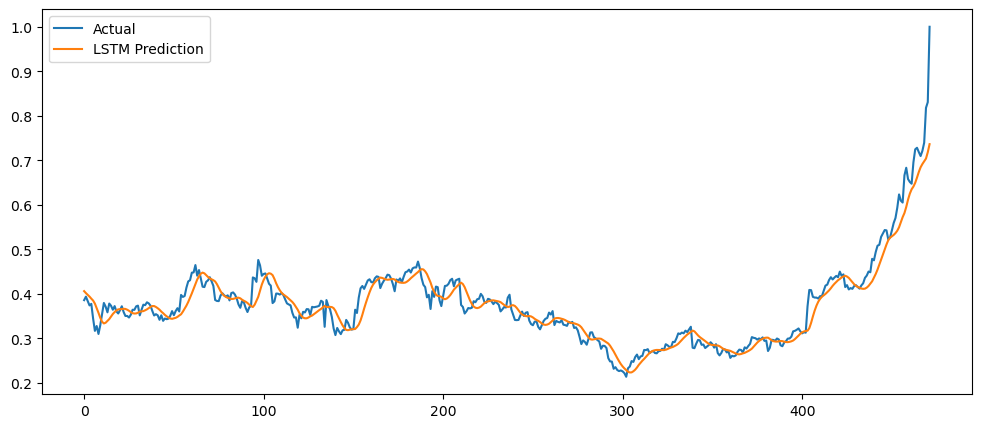

In [24]:
plt.figure(figsize=(12,5))
plt.plot(y_test, label="Actual")
plt.plot(lstm_pred, label="LSTM Prediction")
plt.legend()
plt.show()

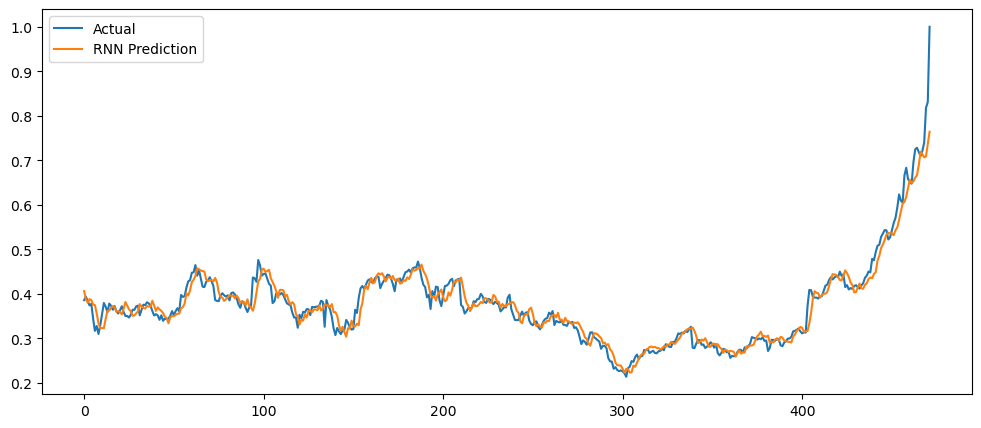

In [25]:
plt.figure(figsize=(12,5))
plt.plot(y_test, label="Actual")
plt.plot(rnn_pred, label="RNN Prediction")
plt.legend()
plt.show()

### for multiday prediction

In [26]:
def predict_future_days(model, scaled_data, window_size, days):
    future_predictions = []
    last_window = scaled_data[-window_size:]
    
    for _ in range(days):
        input_seq = last_window.reshape(1, window_size, 1)
        next_pred = model.predict(input_seq, verbose=0)
        
        future_predictions.append(next_pred[0, 0])
         # updated window (remove first, add predicted window)
        last_window = np.append(last_window[1:], next_pred, axis=0)
    
    return np.array(future_predictions)

In [27]:
future_5_days = predict_future_days(
    model=lstm_model,
    scaled_data=scaled_data,
    window_size=60,
    days=5
)

In [28]:
future_5_days_actual = scaler.inverse_transform(
    future_5_days.reshape(-1, 1)
)

In [29]:
future_10_days = predict_future_days(
    model=lstm_model,
    scaled_data=scaled_data,
    window_size=60,
    days=10
)

In [30]:
future_10_days_actual = scaler.inverse_transform(
    future_10_days.reshape(-1, 1)
)

#### Last 60 days and future prediction

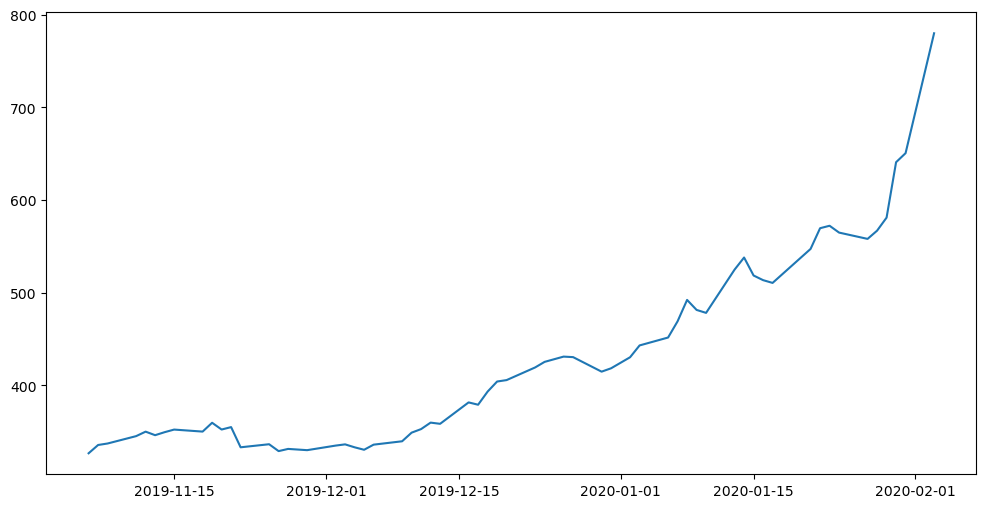

In [31]:
plt.figure(figsize=(12,6))

# actual past prices
plt.plot(
    df.index[-60:], 
    df['Close'].values[-60:], 
    label="Actual Prices"
)

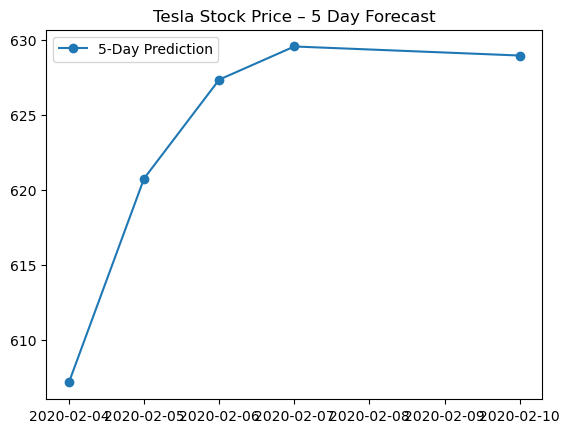

In [32]:
# future dates
future_dates_5 = pd.date_range(
    start=df.index[-1], periods=6, freq='B'
)[1:]

plt.plot(
    future_dates_5, 
    future_5_days_actual, 
    marker='o',
    label="5-Day Prediction"
)

plt.title("Tesla Stock Price – 5 Day Forecast")
plt.legend()
plt.show()


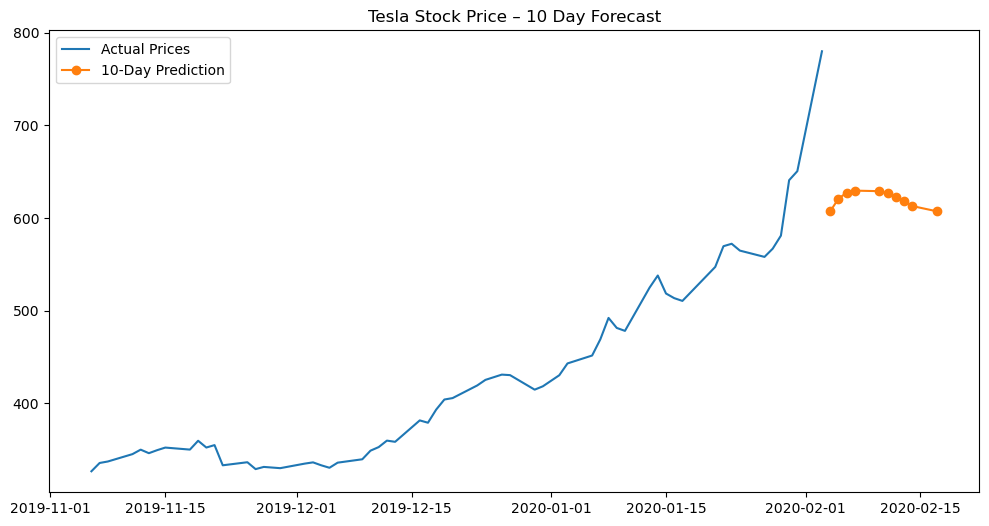

In [33]:
future_dates_10 = pd.date_range(
    start=df.index[-1], periods=11, freq='B'
)[1:]

plt.figure(figsize=(12,6))
plt.plot(df.index[-60:], df['Close'].values[-60:], label="Actual Prices")
plt.plot(future_dates_10, future_10_days_actual, marker='o', label="10-Day Prediction")
plt.title("Tesla Stock Price – 10 Day Forecast")
plt.legend()
plt.show()

In [34]:
from tensorflow.keras.optimizers import Adam

In [35]:
def build_lstm_model(units, dropout_rate, learning_rate):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(dropout_rate),
        LSTM(units),
        Dense(1)
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

In [36]:
units_list = [32, 50]
dropout_list = [0.2, 0.3]
lr_list = [0.001, 0.0005]

In [37]:
best_mse = float("inf")
best_params = None
best_model = None

In [38]:
for units in units_list:
    for dropout in dropout_list:
        for lr in lr_list:
            print(f"Training model: units={units}, dropout={dropout}, lr={lr}")
            
            model = build_lstm_model(units, dropout, lr)
            
            model.fit(
                X_train, y_train,
                epochs=10,
                batch_size=32,
                validation_split=0.1,
                verbose=0
            )
            
            preds = model.predict(X_test, verbose=0)
            mse = mean_squared_error(y_test, preds)
            
            print("MSE:", mse)
            
            if mse < best_mse:
                best_mse = mse
                best_params = (units, dropout, lr)
                best_model = model

Training model: units=32, dropout=0.2, lr=0.001


C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MSE: 0.0011152545083867353
Training model: units=32, dropout=0.2, lr=0.0005


C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MSE: 0.001573710892127168
Training model: units=32, dropout=0.3, lr=0.001


C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MSE: 0.0015097982004877808
Training model: units=32, dropout=0.3, lr=0.0005


C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MSE: 0.0017733861509721645
Training model: units=50, dropout=0.2, lr=0.001


C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MSE: 0.0010752465800682415
Training model: units=50, dropout=0.2, lr=0.0005


C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MSE: 0.0013102662092238438
Training model: units=50, dropout=0.3, lr=0.001


C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MSE: 0.0010282366427456213
Training model: units=50, dropout=0.3, lr=0.0005


C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MSE: 0.0012350525461866252


In [39]:
best_mse

0.0010282366427456213

In [40]:
best_params

(50, 0.3, 0.001)

In [41]:
# Save model in new Keras format (for Streamlit)
lstm_model.save("lstm_model.keras")

# Save scaler again (important)
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']